In [14]:
import json
from urllib import request, parse
import random
from pathlib import Path

from utils import display_image, find_latest_file



In [15]:
def queue_prompt(prompt):
    p = {"prompt": prompt}
    data = json.dumps(p).encode('utf-8')
    req =  request.Request("http://127.0.0.1:8188/prompt", data=data)
    request.urlopen(req)

In [16]:
comfyui_workflow_filepath = Path("../comfyui_workflows/airendering_simple_stillimage_koalared.json")
image_output_name_prefix = "koala_red"

with open(comfyui_workflow_filepath, 'r', encoding='utf-8') as file:
    prompt = json.load(file)

#set the seed for our KSampler node
prompt["20"]["inputs"]["noise_seed"] = 1

#set image name 
prompt["104"]["inputs"]["filename_prefix"] = image_output_name_prefix


queue_prompt(prompt)

In [17]:
comfyui_output_directory = Path(r'C:\Bin\ComfyUI_windows_portable\ComfyUI\output')
prefix = 'your_prefix'
extension = 'png'
latest_file = find_latest_file(comfyui_output_directory, image_output_name_prefix, 'png')
print("The latest file is:", latest_file)

The latest file is: C:\Bin\ComfyUI_windows_portable\ComfyUI\output\koala_red_00001_.png


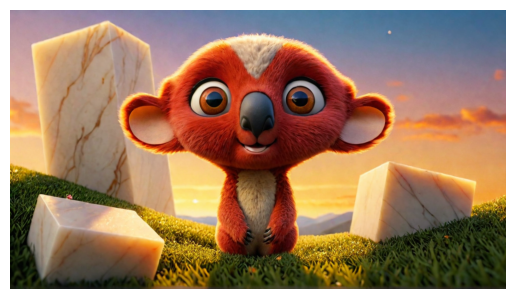

In [19]:
if latest_file:
    display_image(latest_file)